In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\adil2\\Downloads\\Data-Science-ML-Capstone-Projects-master\\Data-Science-ML-Capstone-Projects-master\\Automobile_insurance_fraud.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
#Display maximum rows and columns from the dataset
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
#Displaying Dataset shape
df.shape

(1000, 40)

In [7]:
# Dataset complete information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
#Splitting the policy_bind_date column into day,month and year
df[['Policy_Day','Policy_Month','Policy_Year']] = df['policy_bind_date'].str.split('-',expand = True)

In [9]:
#Splitting the incident_date column into day,month and year
df[['Inci_Day','Inci_Month','Inci_Year']] = df['incident_date'].str.split('-',expand = True)

In [10]:
#Splitting the policy_csl into the total policy approved and policy total like policy amount 
df[['policy_approve','Policy_total']] = df['policy_csl'].str.split('/', expand = True)

In [11]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Policy_Day,Policy_Month,Policy_Year,Inci_Day,Inci_Month,Inci_Year,policy_approve,Policy_total
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,17,10,2014,25,01,2015,250,500
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,27,06,2006,21,01,2015,250,500
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN,06,09,2000,22,02,2015,100,300
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,25,05,1990,10,01,2015,250,500
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN,06,06,2014,17,02,2015,500,1000


In [12]:
#dropping the column of policy_bind_date,incident_date,Inci_Year,_c39,policy_csl which splitted _c39 columns has all the NAN value
df = df.drop(columns = ['policy_bind_date','incident_date','Inci_Year','_c39','policy_csl'])

In [13]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,Inci_Day,Inci_Month,policy_approve,Policy_total
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,01,250,500
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,27,06,2006,21,01,250,500
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,06,09,2000,22,02,100,300
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,05,1990,10,01,250,500
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,06,06,2014,17,02,500,1000


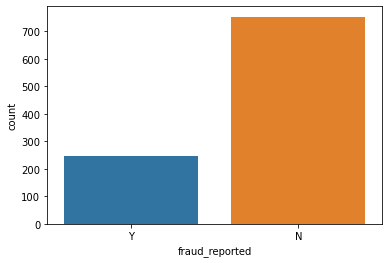

In [14]:
#plotting to check the Labels values has highest rating
sns.countplot(x = df['fraud_reported'])
plt.show()

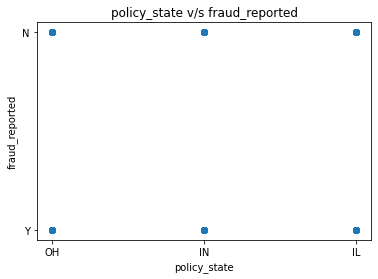

In [15]:
#plotting the scatter plot for objects to check the is there any relationship with label
plt.scatter(df.policy_state,df.fraud_reported)
plt.xlabel('policy_state')
plt.ylabel('fraud_reported')
plt.title('policy_state v/s fraud_reported')
plt.show()

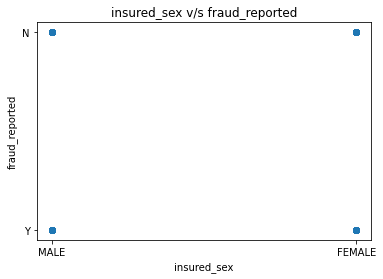

In [16]:
#plotting the scatter plot for objects to check the is there any relationship with label
plt.scatter(df.insured_sex,df.fraud_reported)
plt.xlabel('insured_sex')
plt.ylabel('fraud_reported')
plt.title('insured_sex v/s fraud_reported')
plt.show()

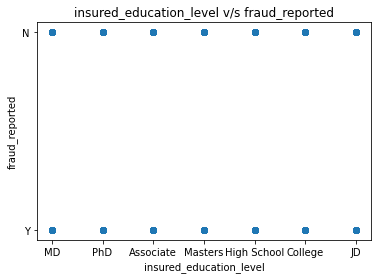

In [17]:
#plotting the scatter plot for objects to check the is there any relationship with label
plt.scatter(df.insured_education_level,df.fraud_reported)
plt.xlabel('insured_education_level')
plt.ylabel('fraud_reported')
plt.title('insured_education_level v/s fraud_reported')
plt.show()

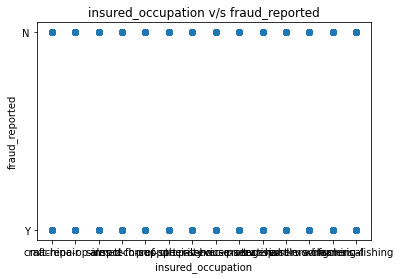

In [18]:
#plotting the scatter plot for objects to check the is there any relationship with label
plt.scatter(df.insured_occupation,df.fraud_reported)
plt.xlabel('insured_occupation')
plt.ylabel('fraud_reported')
plt.title('insured_occupation v/s fraud_reported')
plt.show()

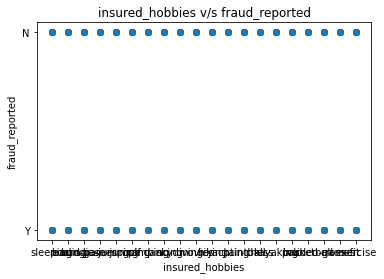

In [19]:
#plotting the scatter plot for objects to check the is there any relationship with label
plt.scatter(df.insured_hobbies,df.fraud_reported)
plt.xlabel('insured_hobbies')
plt.ylabel('fraud_reported')
plt.title('insured_hobbies v/s fraud_reported')
plt.show()

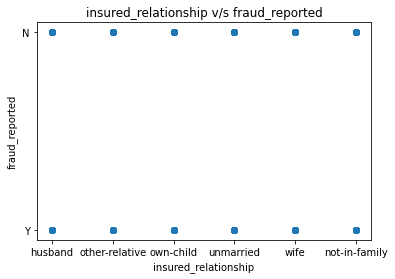

In [20]:
#plotting the scatter plot for objects to check the is there any relationship with label
plt.scatter(df.insured_relationship,df.fraud_reported)
plt.xlabel('insured_relationship')
plt.ylabel('fraud_reported')
plt.title('insured_relationship v/s fraud_reported')
plt.show()

In [21]:
#Checking the values of authorities_contacted column object to confirm the counts 
df.authorities_contacted.value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [22]:
#Checking the values of incident_state column object to confirm the counts 
df.incident_state.value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

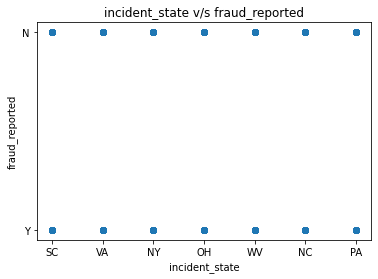

In [23]:
#plotting the scatter plot for objects to check the is there any relationship with label
plt.scatter(df.incident_state,df.fraud_reported)
plt.xlabel('incident_state')
plt.ylabel('fraud_reported')
plt.title('incident_state v/s fraud_reported')
plt.show()

In [24]:
#Dropping the object columns which has no relation with labels then there is no use to kept the object columns in the dataset
df = df.drop(columns = ['age','policy_number','policy_state','insured_sex','insured_education_level','insured_occupation',
                       'insured_hobbies','insured_relationship','incident_state','incident_city','incident_location','auto_make','auto_model'])

In [25]:
df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,Inci_Day,Inci_Month,policy_approve,Policy_total
0,328,1000,1406.91,0,466132,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,2004,Y,17,10,2014,25,01,250,500
1,228,2000,1197.22,5000000,468176,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,2007,Y,27,06,2006,21,01,250,500
2,134,2000,1413.14,5000000,430632,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,2007,N,06,09,2000,22,02,100,300
3,256,2000,1415.74,6000000,608117,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,2014,Y,25,05,1990,10,01,250,500
4,228,1000,1583.91,6000000,610706,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,2009,N,06,06,2014,17,02,500,1000


In [26]:
#LabelEncoder
le = LabelEncoder()

In [27]:
#Transforming the String or objects values into numerical data using LabelEncoder
df1 = le.fit_transform(df['incident_type'])
pd.Series(df1)
df['incident_type'] = df1
df2 = le.fit_transform(df['collision_type'])
pd.Series(df2)
df['collision_type'] = df2
df3 = le.fit_transform(df['incident_severity'])
pd.Series(df3)
df['incident_severity'] = df3
df4 = le.fit_transform(df['authorities_contacted'])
pd.Series(df4)
df['authorities_contacted'] = df4
df5 = le.fit_transform(df['property_damage'])
pd.Series(df5)
df['property_damage'] = df5
df6 = le.fit_transform(df['police_report_available'])
pd.Series(df6)
df['police_report_available'] = df6
df7 = le.fit_transform(df['fraud_reported'])
pd.Series(df7)
df['fraud_reported'] = df7

In [28]:
df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,Inci_Day,Inci_Month,policy_approve,Policy_total
0,328,1000,1406.91,0,466132,53300,0,2,3,0,4,5,1,2,1,2,2,71610,6510,13020,52080,2004,1,17,10,2014,25,01,250,500
1,228,2000,1197.22,5000000,468176,0,0,3,0,1,4,8,1,0,0,0,0,5070,780,780,3510,2007,1,27,06,2006,21,01,250,500
2,134,2000,1413.14,5000000,430632,35100,0,0,2,1,4,7,3,1,2,3,1,34650,7700,3850,23100,2007,0,06,09,2000,22,02,100,300
3,256,2000,1415.74,6000000,608117,48900,-62400,2,1,0,4,5,1,0,1,2,1,63400,6340,6340,50720,2014,1,25,05,1990,10,01,250,500
4,228,1000,1583.91,6000000,610706,66000,-46000,3,0,1,2,20,1,1,0,1,1,6500,1300,650,4550,2009,0,06,06,2014,17,02,500,1000


In [29]:
#Checking the dataset shape
df.shape

(1000, 30)

In [30]:
#splitting the columns into features and columns
x = df.drop(columns = ['fraud_reported'])
y = df['fraud_reported']

In [31]:
x.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Policy_Day,Policy_Month,Policy_Year,Inci_Day,Inci_Month,policy_approve,Policy_total
0,328,1000,1406.91,0,466132,53300,0,2,3,0,4,5,1,2,1,2,2,71610,6510,13020,52080,2004,17,10,2014,25,01,250,500
1,228,2000,1197.22,5000000,468176,0,0,3,0,1,4,8,1,0,0,0,0,5070,780,780,3510,2007,27,06,2006,21,01,250,500
2,134,2000,1413.14,5000000,430632,35100,0,0,2,1,4,7,3,1,2,3,1,34650,7700,3850,23100,2007,06,09,2000,22,02,100,300
3,256,2000,1415.74,6000000,608117,48900,-62400,2,1,0,4,5,1,0,1,2,1,63400,6340,6340,50720,2014,25,05,1990,10,01,250,500
4,228,1000,1583.91,6000000,610706,66000,-46000,3,0,1,2,20,1,1,0,1,1,6500,1300,650,4550,2009,06,06,2014,17,02,500,1000


In [32]:
df.shape

(1000, 30)

In [33]:
y

0      1
1      1
2      0
3      1
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     1
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     0
29     0
30     0
31     1
32     0
33     0
34     0
35     1
36     1
37     0
38     0
39     1
40     0
41     1
42     0
43     0
44     0
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     1
61     0
62     0
63     1
64     1
65     1
66     1
67     0
68     0
69     0
70     1
71     1
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     1
80     0
81     0
82     0
83     0
84     1
85     0
86     0
87     0
88     0
89     1
90     0
91     1
92     0
93     0
94     0
95     0
96     1
97     1
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    1
109    1
110    0
1

In [34]:
#Selecting features using SelectKBest feature selection
best_features = SelectKBest(score_func = f_classif, k=22)
fit = best_features.fit(x,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)

feature_scores =pd.concat([data_columns , data_scores], axis = 1)
feature_scores.columns = ['feature_Name','Score']
print(feature_scores.nlargest(18,'Score'))

                   feature_Name       Score
9             incident_severity  196.960603
20                vehicle_claim   29.718214
17           total_claim_amount   27.463776
19               property_claim   19.327729
8                collision_type   12.252860
18                 injury_claim    8.328776
22                   Policy_Day    3.981923
3                umbrella_limit    3.441452
12  number_of_vehicles_involved    2.689100
7                 incident_type    2.539153
15                    witnesses    2.451026
25                     Inci_Day    2.112140
10        authorities_contacted    2.098018
28                 Policy_total    1.836228
27               policy_approve    1.666960
23                 Policy_Month    1.236704
14              bodily_injuries    1.146656
13              property_damage    0.929077


In [35]:
#Selecting the Best_features columns has high score 
x_new = [['incident_severity','vehicle_claim',' total_claim_amount','property_claim','collision_type','injury_claim','Policy_Day',
         'umbrella_limit','number_of_vehicles_involved','incident_type','witnesses','Inci_Day','authorities_contacted','Policy_total',
         'policy_approve','Policy_Month','bodily_injuries','property_damage']]

In [36]:
x_new = x

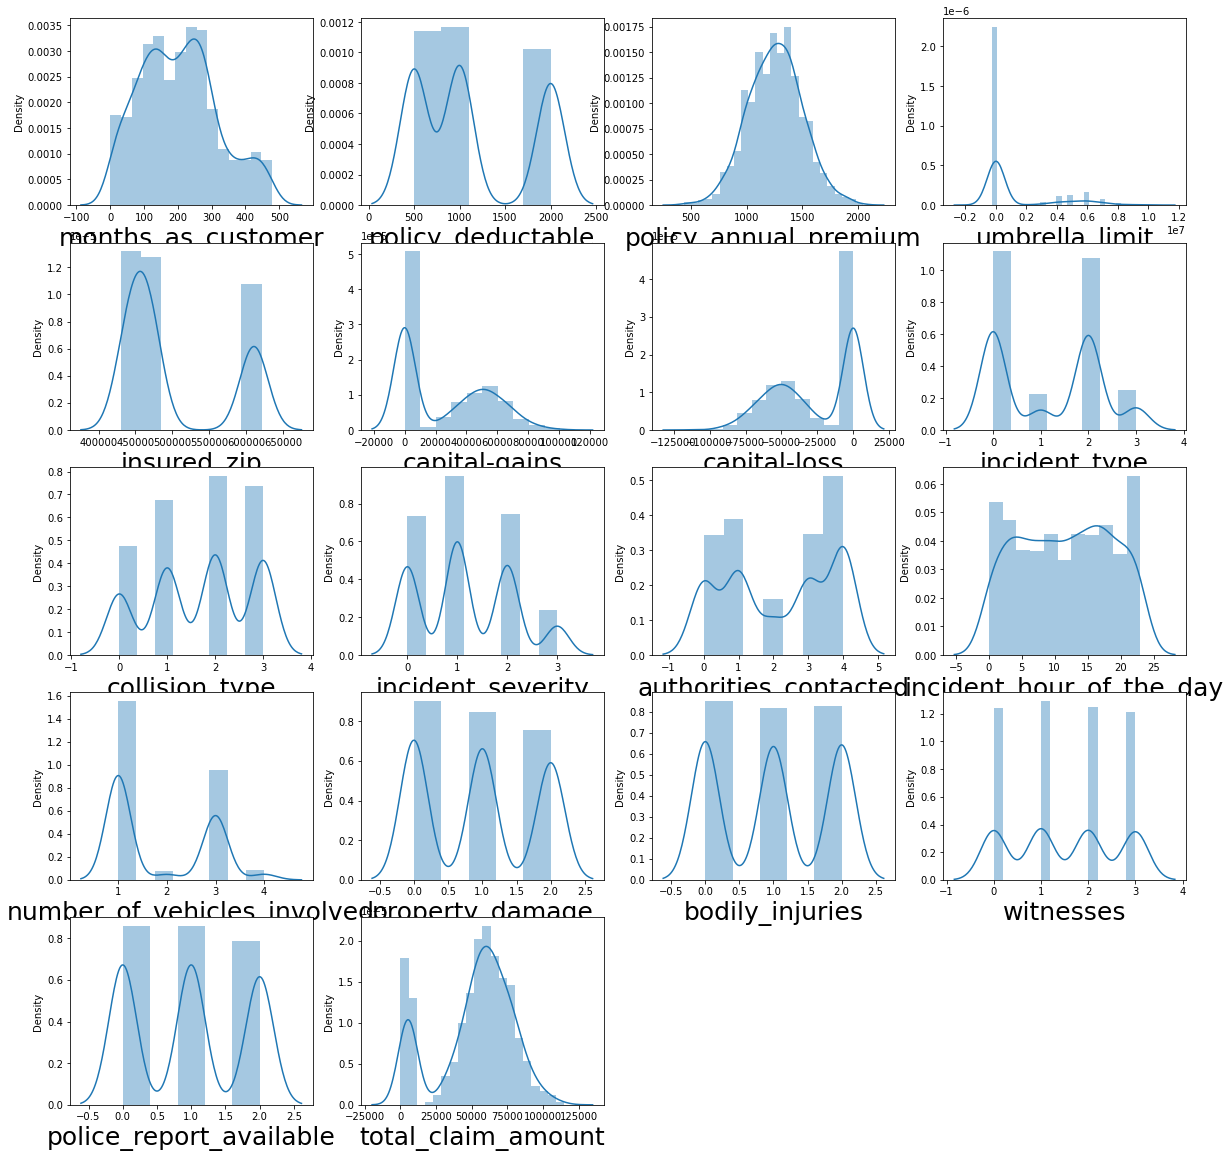

In [37]:
## distribution plot to check the data distribition
plt.figure(figsize = (20,20))
plt_num =1

for column in x:
    if plt_num<=18:
        sx = plt.subplot(5,4,plt_num)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

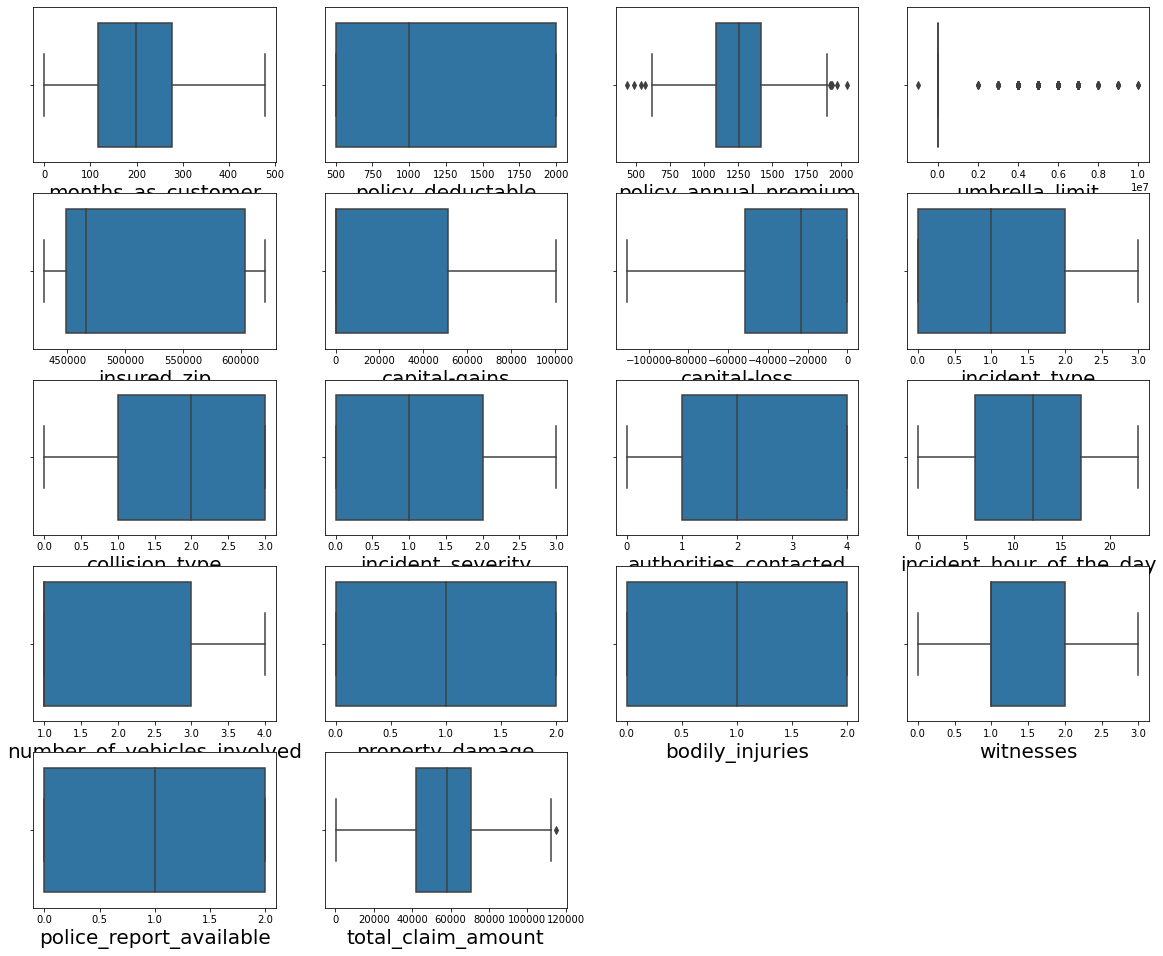

In [38]:
## plotting box plot to check the skewness and outliers in the data set
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=18:
        sx = plt.subplot(6,4,plt_num)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plt_num+=1
plt.show()

In [39]:
##finding the outliers 
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3- q1

In [40]:
iqr

months_as_customer                160.5000
policy_deductable                1500.0000
policy_annual_premium             326.0875
umbrella_limit                      0.0000
insured_zip                    154846.5000
capital-gains                   51025.0000
capital-loss                    51500.0000
incident_type                       2.0000
collision_type                      2.0000
incident_severity                   2.0000
authorities_contacted               3.0000
incident_hour_of_the_day           11.0000
number_of_vehicles_involved         2.0000
property_damage                     2.0000
bodily_injuries                     2.0000
witnesses                           1.0000
police_report_available             2.0000
total_claim_amount              28780.0000
injury_claim                     7010.0000
property_claim                   6440.0000
vehicle_claim                   20530.0000
auto_year                          10.0000
fraud_reported                      0.0000
dtype: floa

In [41]:
# Removing outliers in the policy_annual_premium columns
pap = (q3.policy_annual_premium + (1.5 * iqr.policy_annual_premium))
pap

index = np.where(df['policy_annual_premium']>pap)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,Inci_Day,Inci_Month,policy_approve,Policy_total
0,0,328,1000,1406.91,0,466132,53300,0,2,3,0,4,5,1,2,1,2,2,71610,6510,13020,52080,2004,1,17,10,2014,25,01,250,500
1,1,228,2000,1197.22,5000000,468176,0,0,3,0,1,4,8,1,0,0,0,0,5070,780,780,3510,2007,1,27,06,2006,21,01,250,500
2,2,134,2000,1413.14,5000000,430632,35100,0,0,2,1,4,7,3,1,2,3,1,34650,7700,3850,23100,2007,0,06,09,2000,22,02,100,300
3,3,256,2000,1415.74,6000000,608117,48900,-62400,2,1,0,4,5,1,0,1,2,1,63400,6340,6340,50720,2014,1,25,05,1990,10,01,250,500
4,4,228,1000,1583.91,6000000,610706,66000,-46000,3,0,1,2,20,1,1,0,1,1,6500,1300,650,4550,2009,0,06,06,2014,17,02,500,1000
5,5,256,1000,1351.10,0,478456,0,0,0,2,0,1,19,3,1,0,2,1,64100,6410,6410,51280,2003,1,12,10,2006,02,01,250,500
6,6,137,1000,1333.35,0,441716,0,-77000,0,1,1,4,0,3,0,0,0,0,78650,21450,7150,50050,2012,0,04,06,2000,13,01,250,500
7,7,165,1000,1137.03,0,603195,0,0,0,1,2,4,23,3,0,2,2,2,51590,9380,9380,32830,2015,0,03,02,1990,27,02,100,300
8,8,27,500,1442.99,0,601734,0,0,2,1,2,4,21,1,1,1,1,2,27700,2770,2770,22160,2012,0,05,02,1997,30,01,100,300
9,9,212,500,1315.68,0,600983,0,-39300,2,2,2,3,14,1,1,2,1,0,42300,4700,4700,32900,1996,0,25,07,2011,05,01,100,300


In [42]:
# Removing outliers in the umbrella_limit columns
ul = (q3.umbrella_limit + (1.5 * iqr.umbrella_limit))
ul

index = np.where(df['umbrella_limit']>ul)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,Inci_Day,Inci_Month,policy_approve,Policy_total
0,0,328,1000,1406.91,0,466132,53300,0,2,3,0,4,5,1,2,1,2,2,71610,6510,13020,52080,2004,1,17,10,2014,25,01,250,500
1,5,256,1000,1351.10,0,478456,0,0,0,2,0,1,19,3,1,0,2,1,64100,6410,6410,51280,2003,1,12,10,2006,02,01,250,500
2,6,137,1000,1333.35,0,441716,0,-77000,0,1,1,4,0,3,0,0,0,0,78650,21450,7150,50050,2012,0,04,06,2000,13,01,250,500
3,7,165,1000,1137.03,0,603195,0,0,0,1,2,4,23,3,0,2,2,2,51590,9380,9380,32830,2015,0,03,02,1990,27,02,100,300
4,8,27,500,1442.99,0,601734,0,0,2,1,2,4,21,1,1,1,1,2,27700,2770,2770,22160,2012,0,05,02,1997,30,01,100,300
5,9,212,500,1315.68,0,600983,0,-39300,2,2,2,3,14,1,1,2,1,0,42300,4700,4700,32900,1996,0,25,07,2011,05,01,100,300
6,11,447,2000,1137.16,0,615561,0,-51000,0,1,0,1,21,3,2,1,2,2,114920,17680,17680,79560,2006,0,29,05,1999,15,02,100,300
7,13,121,1000,936.61,0,464652,52800,-32800,1,0,1,2,5,1,1,1,1,1,7280,1120,1120,5040,2010,0,26,10,2012,08,01,100,300
8,14,180,2000,1301.13,0,476685,41300,-55500,2,2,2,4,12,1,1,0,2,2,46200,4200,8400,33600,2003,1,28,12,1998,15,01,250,500
9,15,473,2000,1131.40,0,458733,55700,0,0,3,0,3,12,4,2,0,0,1,63120,10520,10520,42080,1999,1,19,10,1992,29,01,100,300


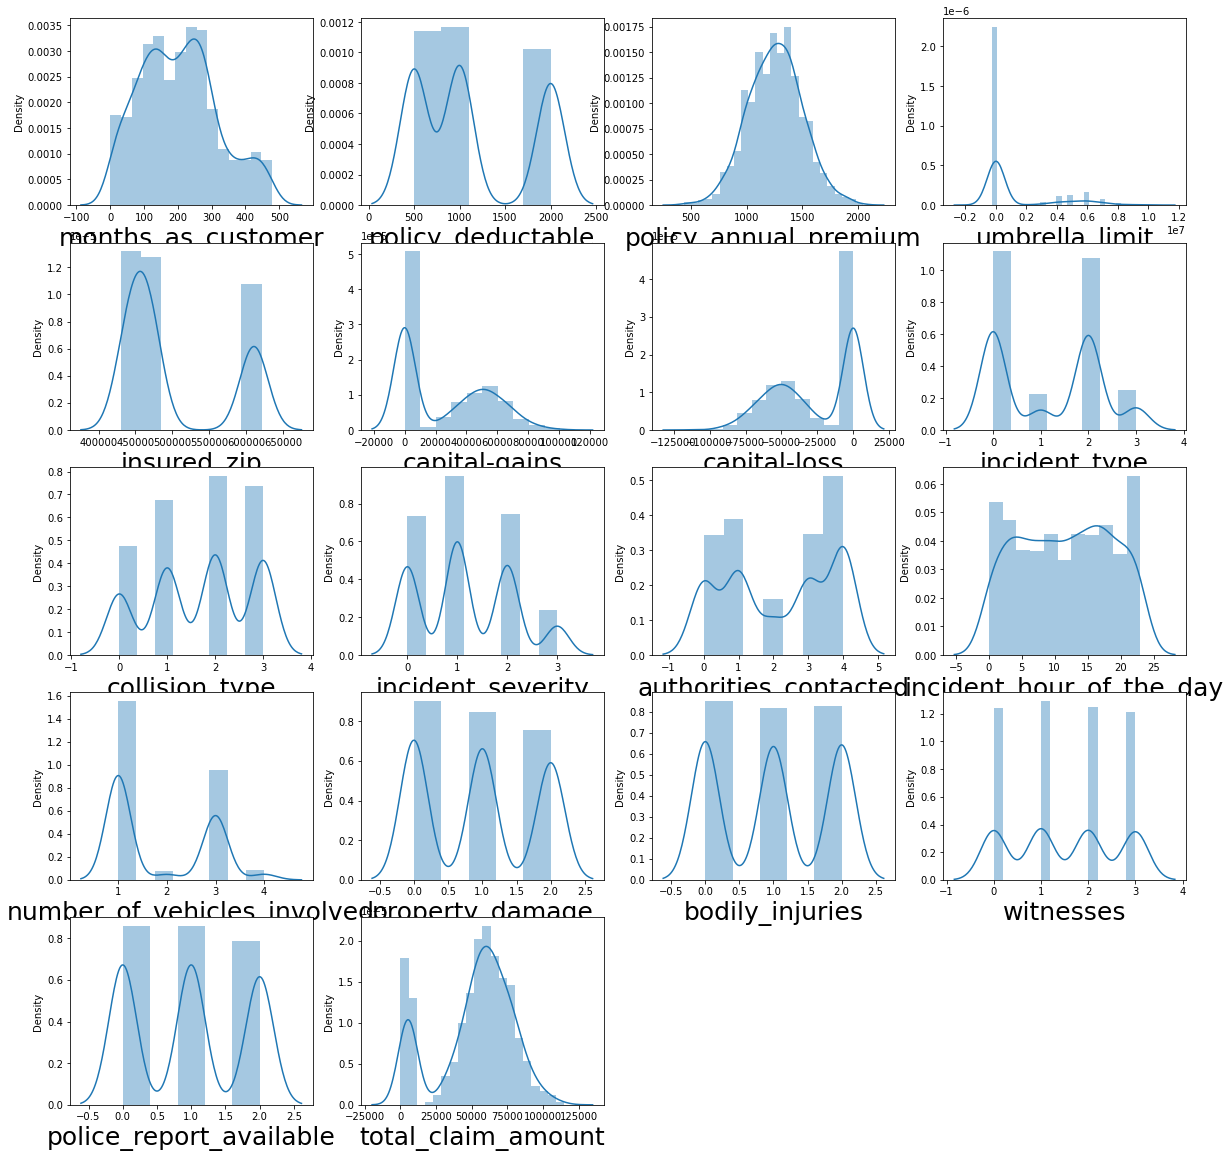

In [43]:
## distribution plot to check the data distribition
plt.figure(figsize = (20,20))
plt_num =1

for column in x:
    if plt_num<=18:
        sx = plt.subplot(5,4,plt_num)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

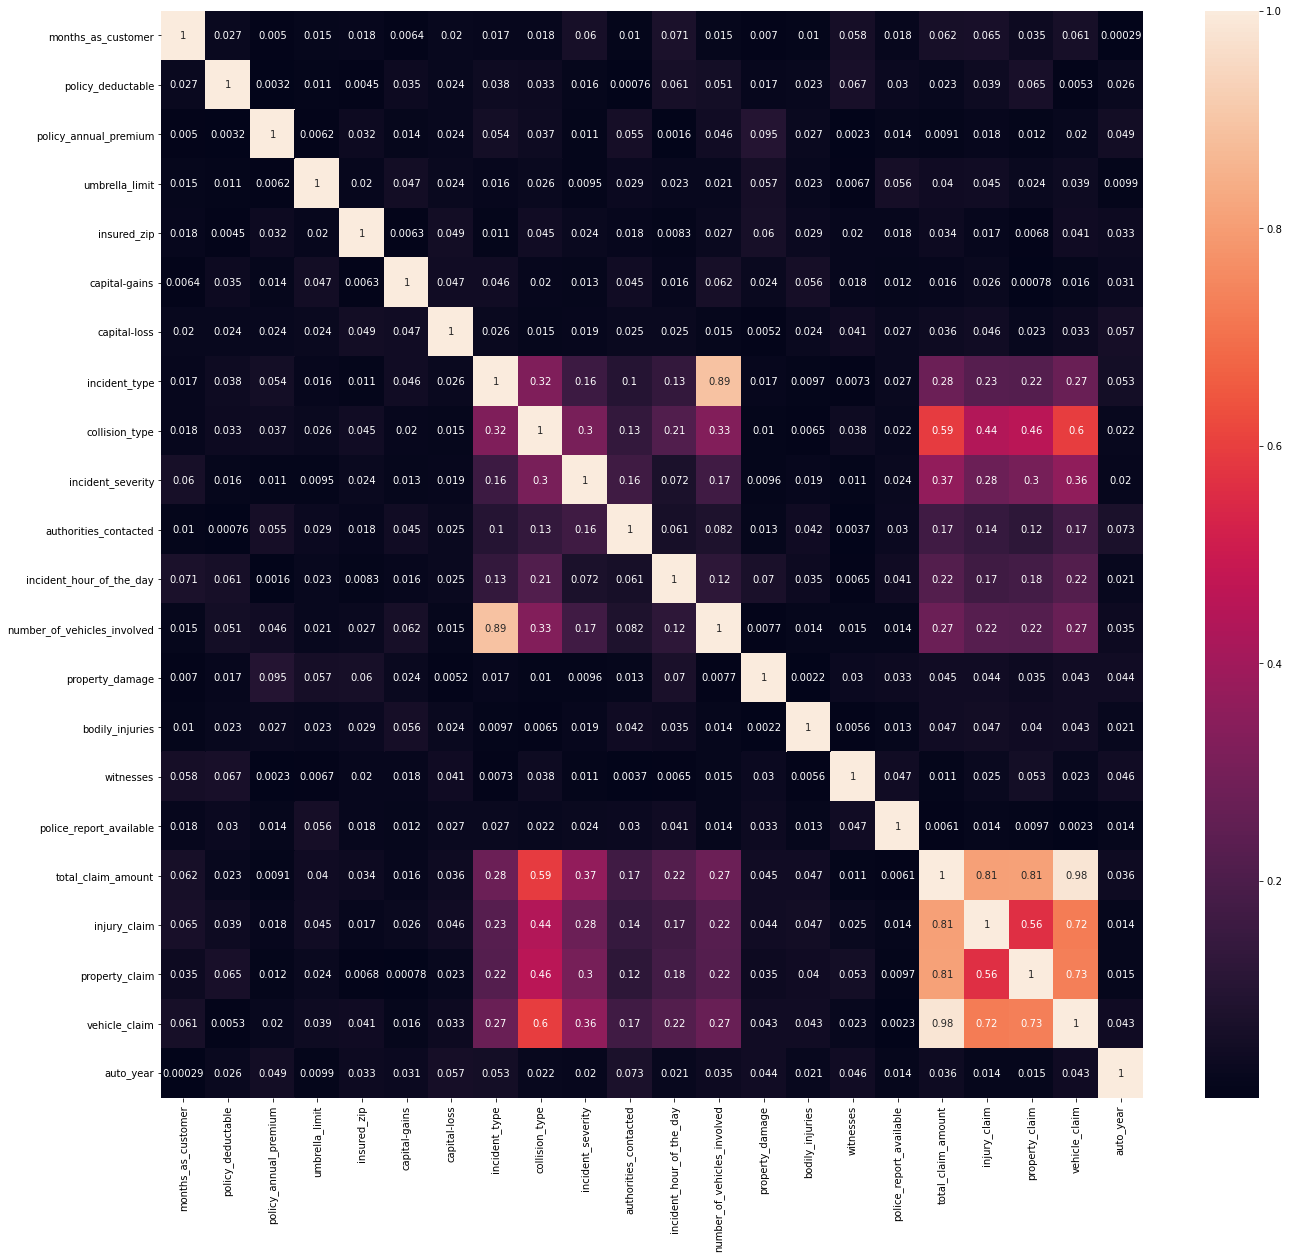

In [44]:
#Checking the relation between the features co-relation
x_corr = x.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(x_corr,annot = True,annot_kws = {'size':10})
plt.show()

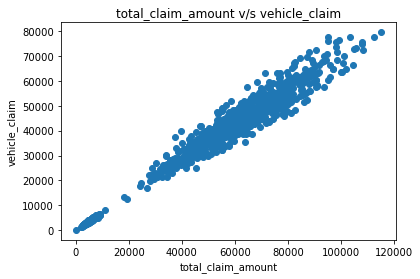

In [45]:
## plotting scatter plot to confirm co_relation between total_claim_amount and vehicle_claim
plt.scatter(x.total_claim_amount,x.vehicle_claim)
plt.xlabel('total_claim_amount')
plt.ylabel('vehicle_claim')
plt.title('total_claim_amount v/s vehicle_claim')
plt.show()

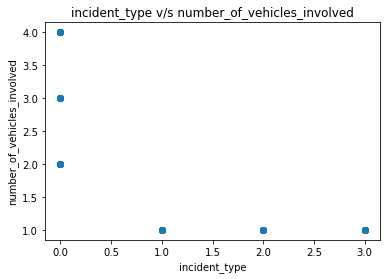

In [46]:
## plotting scatter plot to confirm co_relation between incident_type and number_of_vehicles_involved
plt.scatter(x.incident_type,x.number_of_vehicles_involved)
plt.xlabel('incident_type')
plt.ylabel('number_of_vehicles_involved')
plt.title('incident_type v/s number_of_vehicles_involved')
plt.show()

In [47]:
# As plotted scatterplot and heatmap it seems total_claim_amount and vehicle_claim has high co_variance so dropping the total_claim_amount colummn
x = x.drop(columns = ['total_claim_amount'])

In [48]:
x.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_year,Policy_Day,Policy_Month,Policy_Year,Inci_Day,Inci_Month,policy_approve,Policy_total
0,328,1000,1406.91,0,466132,53300,0,2,3,0,4,5,1,2,1,2,2,6510,13020,52080,2004,17,10,2014,25,01,250,500
1,228,2000,1197.22,5000000,468176,0,0,3,0,1,4,8,1,0,0,0,0,780,780,3510,2007,27,06,2006,21,01,250,500
2,134,2000,1413.14,5000000,430632,35100,0,0,2,1,4,7,3,1,2,3,1,7700,3850,23100,2007,06,09,2000,22,02,100,300
3,256,2000,1415.74,6000000,608117,48900,-62400,2,1,0,4,5,1,0,1,2,1,6340,6340,50720,2014,25,05,1990,10,01,250,500
4,228,1000,1583.91,6000000,610706,66000,-46000,3,0,1,2,20,1,1,0,1,1,1300,650,4550,2009,06,06,2014,17,02,500,1000


In [49]:
##Transforming the dataset into standard form using StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x,y)

In [50]:
##splitting into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 392)

In [51]:
#using KNeighbors classifier algorithm for this prolem statement for  classification problem
knn = KNeighborsClassifier()

In [52]:
# Applying the KNNAlgorithm into training data
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
#Predicting the value 
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[172,  10],
       [ 55,  13]], dtype=int64)

In [55]:
#classification)report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       182
           1       0.57      0.19      0.29        68

    accuracy                           0.74       250
   macro avg       0.66      0.57      0.56       250
weighted avg       0.71      0.74      0.69       250



In [56]:
#Cross validation score 
cross_val_score(knn,x_sc,y,cv = 5)

array([0.725, 0.735, 0.745, 0.755, 0.72 ])

In [57]:
#cross validation for cross checking the accuracy score
cross_val_score(KNeighborsClassifier(),x_sc,y,cv =5).mean()

0.736

In [58]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
param_grid = { 'algorithm' : ['kd_tree','brute'],'leaf_size' : [3,5,7,9],'n_neighbors' : [3,5,7,9]}

In [59]:
gri_se = GridSearchCV(estimator = knn,param_grid = param_grid)
gri_se.fit(x_train,y_train)
gri_se.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 9}

In [60]:
#Using kdtree for nearest neighbor with leafsize 
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3 , n_neighbors = 9)

In [61]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

In [62]:
#Predicting the values
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
#confusion matrix after hyperparameter tunning
cf = confusion_matrix(y_test,y_pred)
cf

array([[176,   6],
       [ 62,   6]], dtype=int64)

In [64]:
#Classification Report after Hyperparameter tunning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       182
           1       0.50      0.09      0.15        68

    accuracy                           0.73       250
   macro avg       0.62      0.53      0.49       250
weighted avg       0.67      0.73      0.65       250



In [65]:
# Applying DecisonTreeClassifier Algorithm for classification problem
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
# Applying the Algorithm into training data
dtc.score(x_train,y_train)

1.0

In [67]:
# predicting the values
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
#Accuracy score of DecisionTreeClassifier
accuracy_score(y_test,y_pred)

0.676

In [69]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[141,  41],
       [ 40,  28]], dtype=int64)

In [70]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       182
           1       0.41      0.41      0.41        68

    accuracy                           0.68       250
   macro avg       0.59      0.59      0.59       250
weighted avg       0.68      0.68      0.68       250



In [71]:
#Cross validation score 
cross_val_score(dtc,x_sc,y,cv = 5)

array([0.74 , 0.745, 0.68 , 0.72 , 0.795])

In [72]:
cross_val_score(DecisionTreeClassifier(),x_sc,y,cv =5).mean()

0.731

In [73]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
grid_param = {'criterion':['gini','entropy'],'max_depth' : range(2,6),'min_samples_leaf':range(1,6),'min_samples_split':range(1,7)}

In [74]:
grid_search = GridSearchCV(estimator = dtc,param_grid = grid_param,cv = 5)

In [75]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 7)})

In [76]:
#checking the best Parameter
best_param = grid_search.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [77]:
#Applying the best parameters into DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 4,min_samples_leaf = 2,min_samples_split = 3)

In [78]:
#Applying the best parameters into training data
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=3)

In [79]:
#predicting the values with new Parameters
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
accuracy_score(y_test,y_pred)

0.784

In [81]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       182
           1       0.62      0.53      0.57        68

    accuracy                           0.78       250
   macro avg       0.73      0.70      0.71       250
weighted avg       0.78      0.78      0.78       250



In [82]:
## We used two Algorithm for this Insurance Claims Fraud Detection classifiaction problem 
 #KNNeighbourClasssifier we got 73% Accuracy after Hyper tunning
    ## DecisionTreeClassifier we got 78% Accuracy after Hyper tunning 
    
    #For this classifiaction probrlem DecisionTreeClassifier algorithm fit provide high accuracy